# Preprocess

c:\Anaconda3\envs\torch37\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Anaconda3\envs\torch37\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2165 non-null   datetime64[ns]
 1   C_Price         2165 non-null   float64       
 2   C_Price_min     2165 non-null   float64       
 3   C_Price_max     2165 non-null   float64       
 4   C_Price_mean    2165 non-null   float64       
 5   C_Price_median  2165 non-null   float64       
 6   E_Price         1572 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 118.5 KB
None
        Date  C_Price  C_Price_min  C_Price_max  C_Price_mean  C_Price_median  \
0 2013-01-07     6.18         5.75         6.50          6.10            6.11   
1 2013-01-08     6.35         5.19         6.56          6.26            6.30   
2 2013-01-10     5.93         4.00         6.25          5.87            5.93   
3 2013-01-11     5.75         5.00  

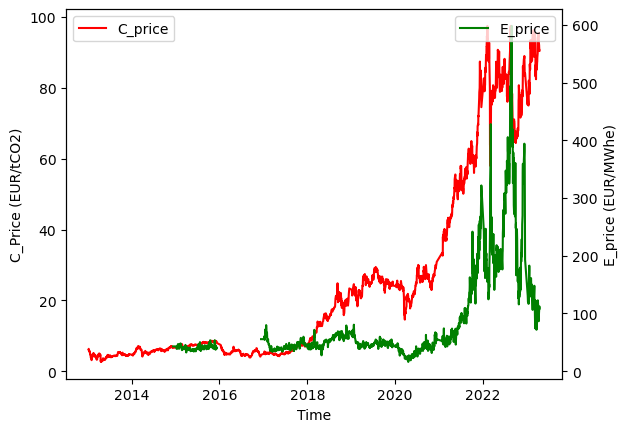

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate dataset for carbon credit price prediction from various sources
from Preprocess import preprocess_source

rootdir = 'data/source'
df = preprocess_source(rootdir)

print(df.info())
print(df.head())

date_col = df['Date']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(date_col, df['C_Price'], 'r', label='C_price')
ax1.legend(loc=2)
ax1.set_ylabel('C_Price (EUR/tCO2)')
ax1.set_xlabel('Time')
ax2 = ax1.twinx() # this is the important function
ax2.plot(date_col, df['E_Price'], 'g', label='E_price')
ax2.legend(loc=1)
ax2.set_ylabel('E_price (EUR/MWhe)')
plt.show()

# Load Data and helper functions

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2165 entries, 2013-01-07 00:00:00 to 2023-04-18 00:00:00
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2165 non-null   int64  
 1   C_Price         2165 non-null   float64
 2   C_Price_min     2165 non-null   float64
 3   C_Price_max     2165 non-null   float64
 4   C_Price_mean    2165 non-null   float64
 5   C_Price_median  2165 non-null   float64
 6   E_Price         1572 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 135.3 KB
None
            Unnamed: 0  C_Price  C_Price_min  C_Price_max  C_Price_mean  \
Date                                                                      
2013-01-07           0     6.18         5.75         6.50          6.10   
2013-01-08           1     6.35         5.19         6.56          6.26   
2013-01-10           2     5.93         4.00         6.25          5.87   
2013-01-11           

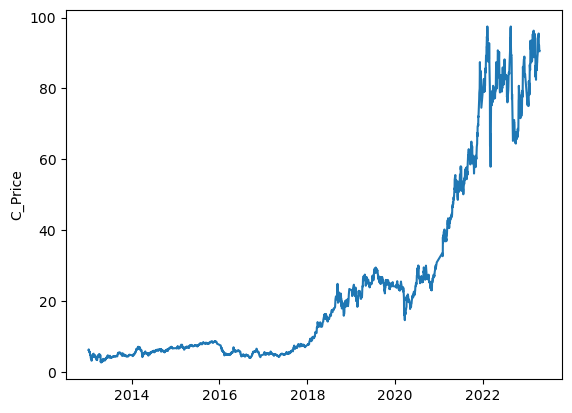

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import cal_rmse

# load data
df = pd.read_excel('data\source\CCprice.xlsx', sheet_name='Sheet1')
df = df.set_index('Date')
df.index = pd.DatetimeIndex(df.index)
df.index.freq = df.index.inferred_freq
date_col = df.index

# overview of data
print(df.info())
print(df.head())
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(date_col, df['C_Price'])
ax1.set_ylabel('C_Price')
plt.show()

y = np.array(df['C_Price'])
t = range(len(y))

In [3]:
def plot_sigs_and_spec(decomp_method, imfs, orig=None, res=None):

    norig = 1 if orig is not None else 0
    nres = 1 if res is not None else 0
    nrow = norig + len(imfs) + nres

    fig, axes = plt.subplots(nrow, 2, figsize=(10,10))

    # orig
    if orig is not None:
        # time
        ax = axes[0][0]
        ax.set_title(decomp_method)
        ax.plot(orig, 'r')
        ax.set_ylabel('orig')
        # freq
        ax = axes[0][1]
        ax.set_title('spectrum')
        yfft = np.fft.fftshift(np.fft.fft(orig))
        ax.plot(yfft, 'r')

    # imfs / modes / pfs
    for i in range(len(imfs)):
        # time
        ax = axes[i+norig][0]
        ax.plot(imfs[i], 'g')
        ax.set_ylabel('S%d' %(i+1))
        # freq
        ax = axes[i+norig][1]
        yfft = np.fft.fftshift(np.fft.fft(imfs[i]))
        ax.plot(yfft, 'g')

    # res
    if res is not None:  
        # time
        ax = axes[-1][0]
        ax.plot(res, 'g')
        ax.set_ylabel('res')
        # freq
        ax = axes[-1][1]
        yfft = np.fft.fftshift(np.fft.fft(res))
        ax.plot(yfft, 'g')

    ax = axes[-1][0]
    ax.set_xlabel("Time")
    ax = axes[-1][1]
    ax.set_xlabel("Freq")    

    plt.tight_layout()
    plt.show()
    return


# EMD++

Install PyEMD: `$ pip install EMD-signal`.

ATTENTION: `$ pip install pyemd` is not correct, `pyemd` is another package.

IMPORTANT!! After installation, go to `C:\Anaconda3\envs\torch37\Lib\site-packages`, change folder name from `pyemd` to `PyEMD`, then `import PyEMD`.

[PyEMD's doc](https://pyemd.readthedocs.io/en/latest/index.html)


Three variations of EMD is explored:

1. EMD (Empirical Mode Decomposition)

> N. E. Huang et al., “The empirical mode decomposition and the Hilbert spectrum for non-linear and non stationary time series analysis”, Proc. Royal Soc. London A, Vol. 454, pp. 903-995, 1998

2. EEMD (Ensemble Empirical Mode Decomposition)

> Z. Wu and N. E. Huang, “Ensemble empirical mode decomposition: A noise-assisted data analysis method”, Advances in Adaptive Data Analysis, Vol. 1, No. 1 (2009) 1-41.

3. CEEMDAN (Complete ensemble EMD with adaptive noise)

> M.E. Torres, M.A. Colominas, G. Schlotthauer, P. Flandrin A complete ensemble empirical mode decomposition with adaptive noise. Acoustics, Speech and Signal Processing (ICASSP), 2011, pp. 4144–4147

> M.A. Colominas, G. Schlotthauer, M.E. Torres, Improved complete ensemble EMD: A suitable tool for biomedical signal processing, In Biomed. Sig. Proc. and Control, V. 14, 2014, pp. 19–29

In [4]:
from PyEMD import EMD, EEMD, CEEMDAN, Visualisation
from PyEMD.compact import filt6, pade6
from scipy.signal import hilbert

In [5]:
emd = EMD()
emd.emd(y)
imfs_emd, res_emd = emd.get_imfs_and_residue()

eemd = EEMD()
eemd.eemd(y)
imfs_eemd, res_eemd = eemd.get_imfs_and_residue()

ceemdan = CEEMDAN()
ceemdan.ceemdan(y)
imfs_ceemdan, res_ceemdan = ceemdan.get_imfs_and_residue()


c:\Anaconda3\envs\torch37\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


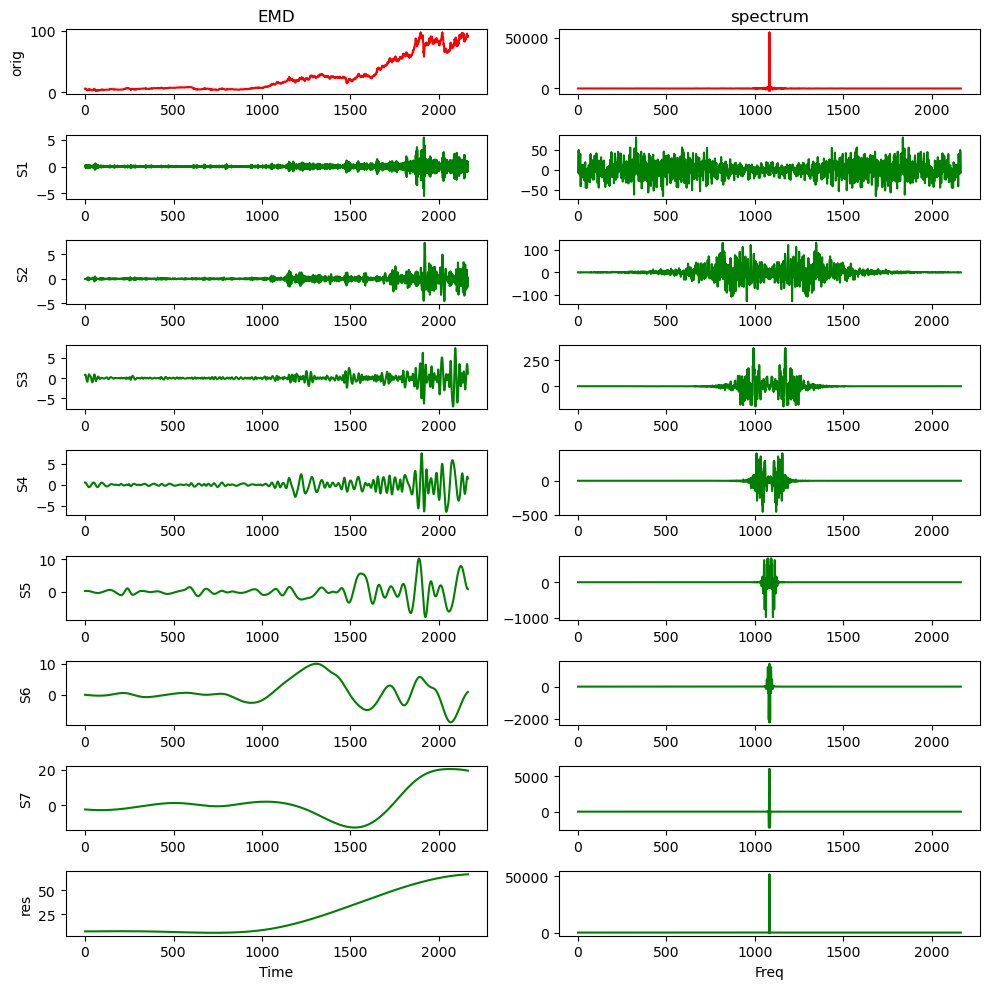

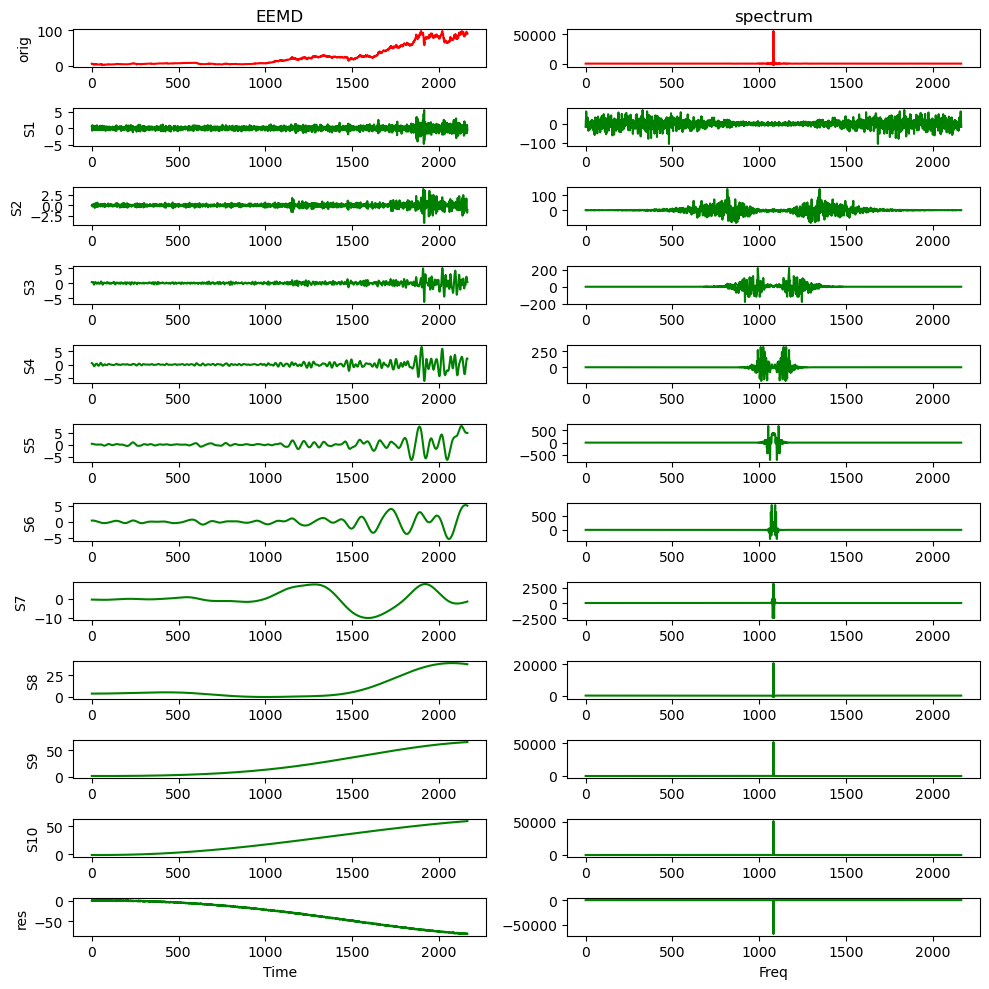

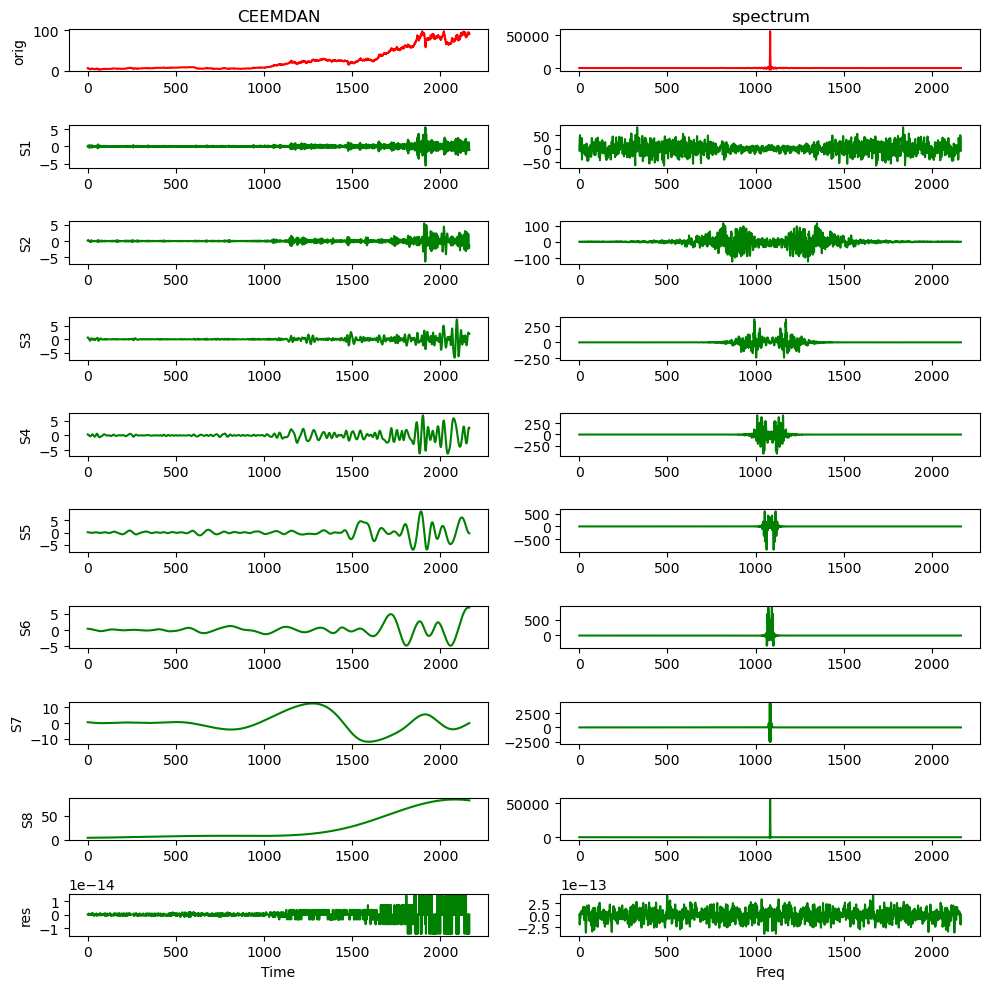

In [6]:
plot_sigs_and_spec('EMD', imfs_emd, y, res_emd)
plot_sigs_and_spec('EEMD', imfs_eemd, y, res_eemd)
plot_sigs_and_spec('CEEMDAN', imfs_ceemdan, y, res_ceemdan)

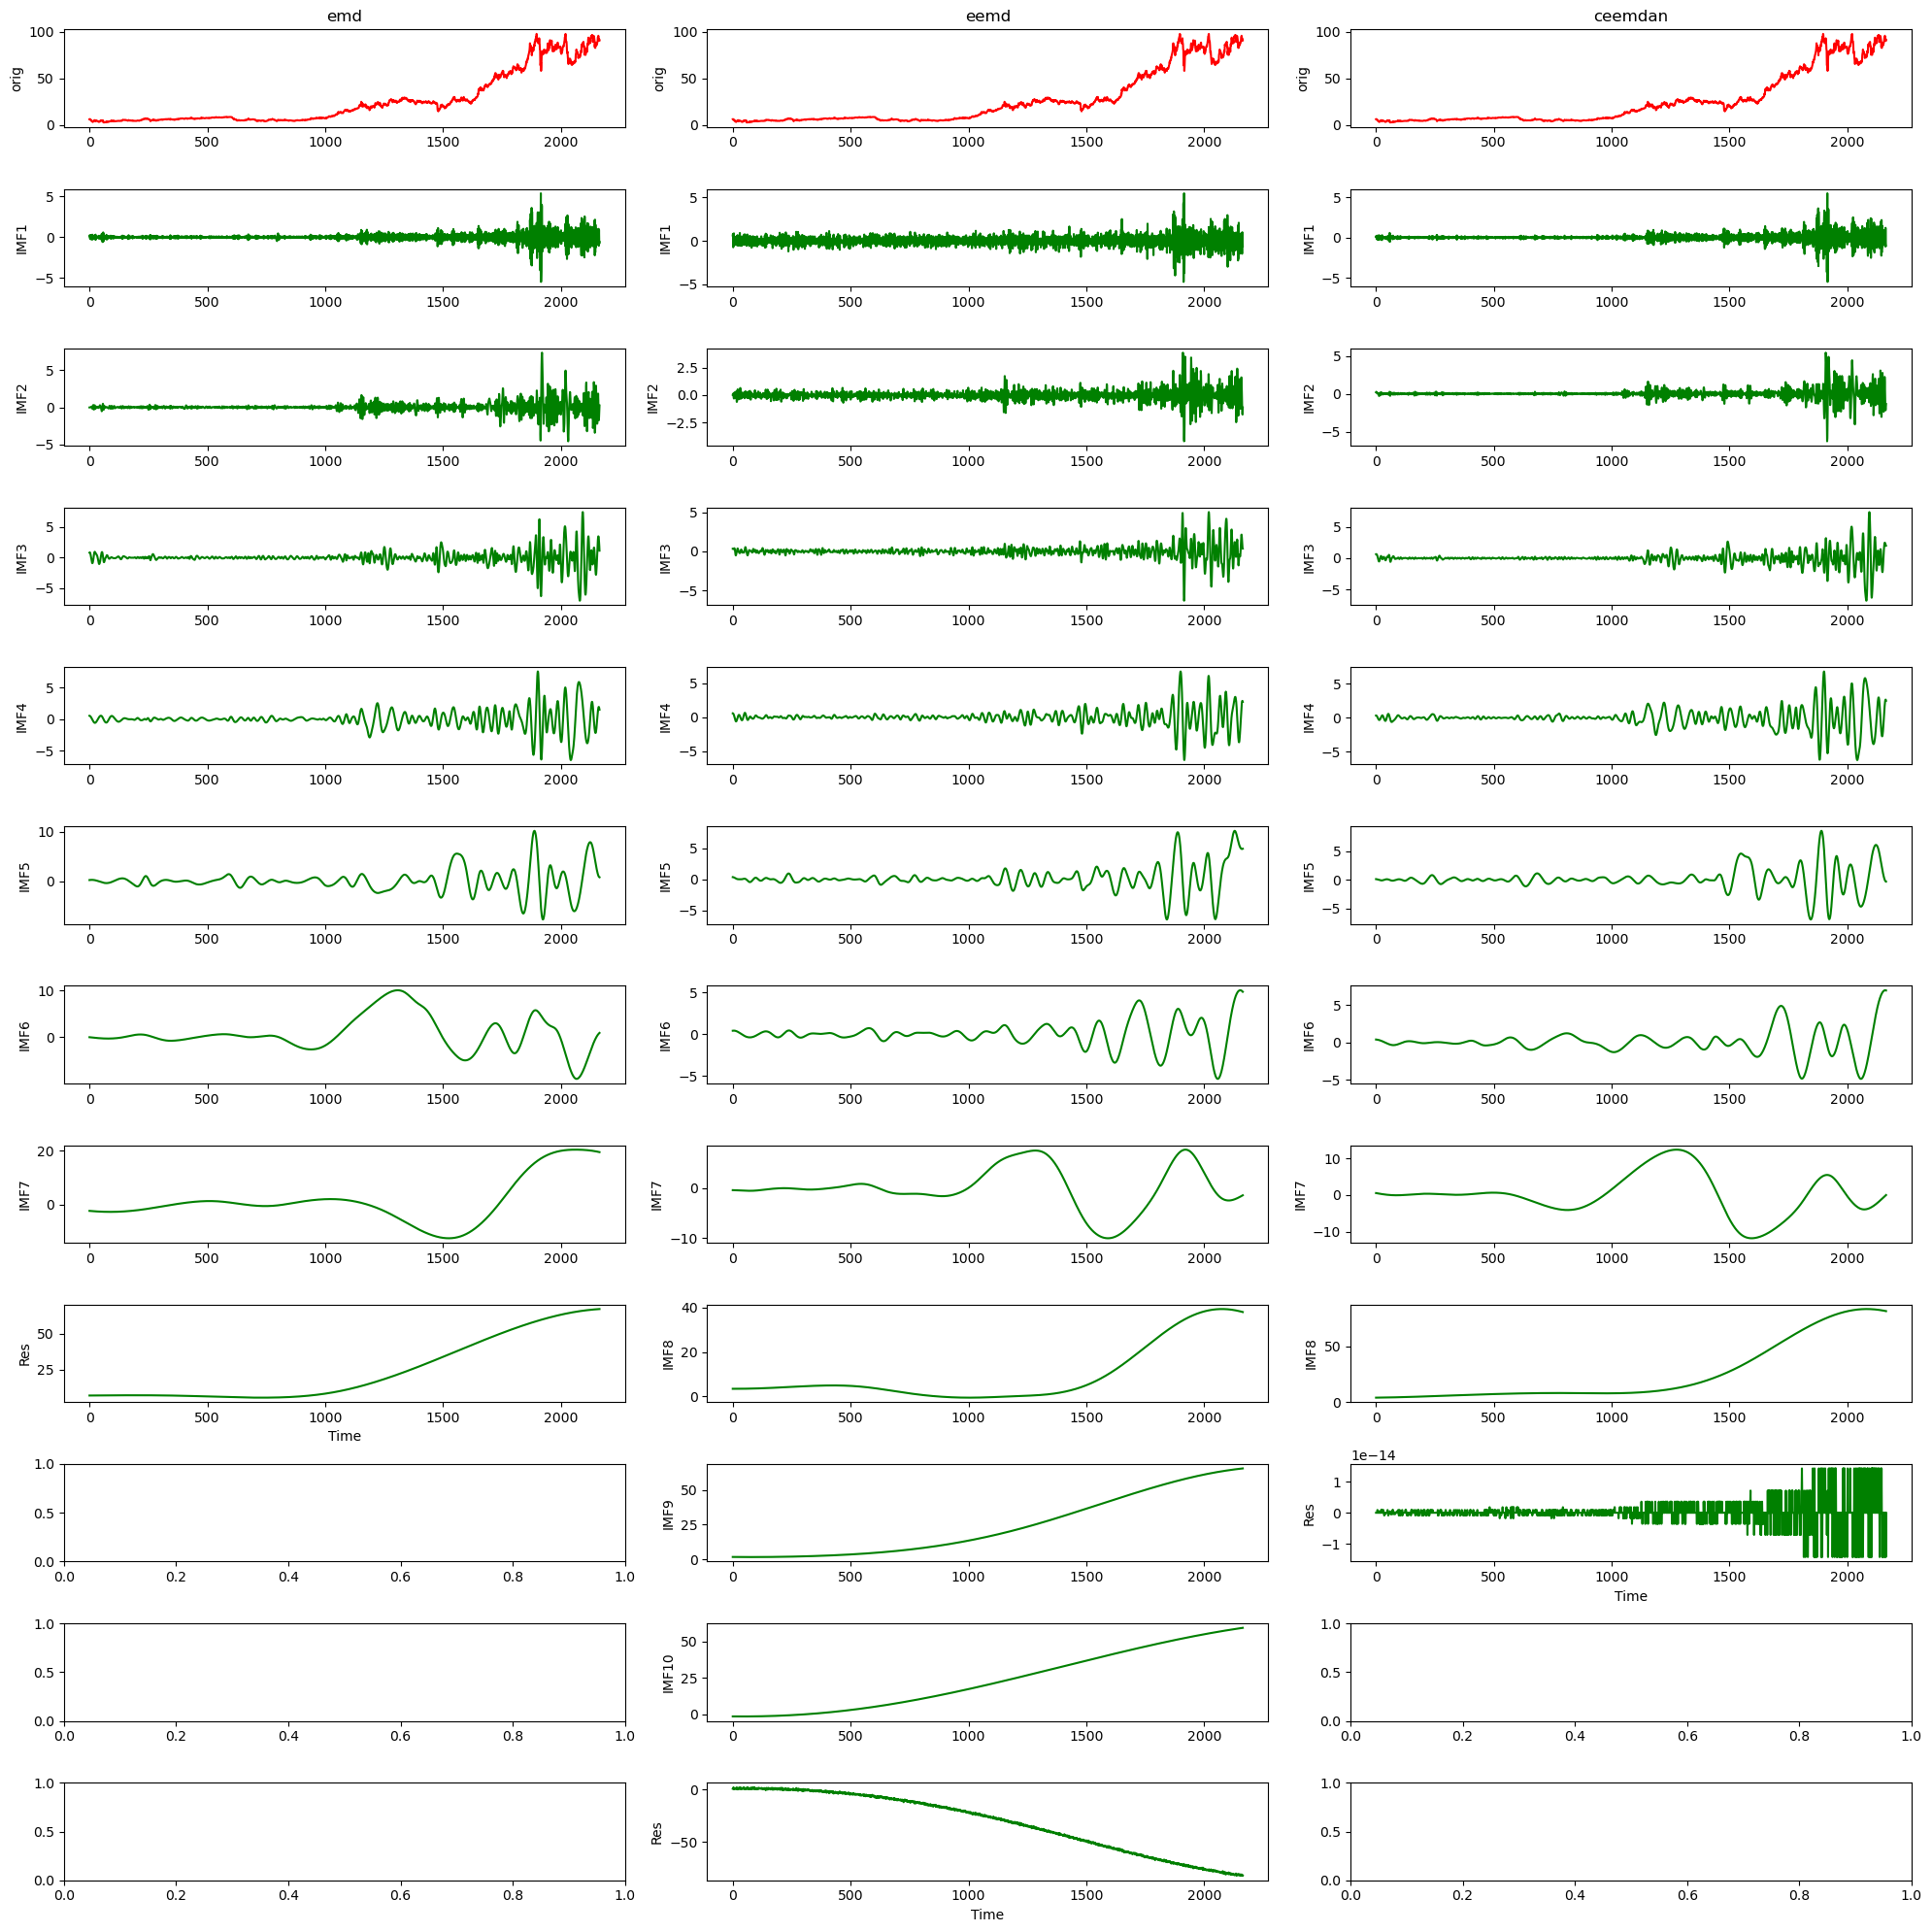

In [7]:
cols = ['emd', 'eemd', 'ceemdan']
ncol = len(cols)
imfs = [imfs_emd, imfs_eemd, imfs_ceemdan]
ress = [res_emd, res_eemd, res_ceemdan]
nrow = max(imfs_emd.shape[0], imfs_eemd.shape[0], imfs_ceemdan.shape[0]) + 2 # orig + imfs + res

fig, axes = plt.subplots(nrow, ncol, figsize=(20,20))

for c in range(len(cols)):
    # orig series
    ax = axes[0][c]
    ax.set_title(cols[c])
    ax.plot(t, y, 'r')
    ax.set_ylabel('orig')
    # imfs
    for n, imf in enumerate(imfs[c]):
        ax = axes[n+1][c]
        ax.plot(t, imf, 'g')
        ax.set_ylabel('IMF'+str(n+1))
    # residue
    ax = axes[n+2][c]
    ax.plot(t, ress[c], 'g')
    ax.set_ylabel('Res')
    ax.set_xlabel("Time")

plt.tight_layout()
plt.show()

In [8]:
def _calc_inst_phase(sig, alpha):
    """Extract analytical signal through the Hilbert Transform."""
    analytic_signal = hilbert(sig)  # Apply Hilbert transform to each row
    if alpha is not None:
        assert -0.5 < alpha < 0.5, "`alpha` must be in between -0.5 and 0.5"
        real_part = np.array([filt6(row.real, alpha) for row in analytic_signal])
        imag_part = np.array([filt6(row.imag, alpha) for row in analytic_signal])
        analytic_signal = real_part + 1j * imag_part
    phase = np.unwrap(np.angle(analytic_signal))  # Compute angle between img and real
    if alpha is not None:
        phase = np.array([filt6(row, alpha) for row in phase])  # Filter phase
    return phase

def _calc_inst_freq(sig, t, order=False, alpha=None):
    """Extracts instantaneous frequency through the Hilbert Transform."""
    inst_phase = _calc_inst_phase(sig, alpha=alpha)
    if order is False:
        inst_freqs = np.diff(inst_phase) / (2 * np.pi * (t[1] - t[0]))
        inst_freqs = np.concatenate((inst_freqs, inst_freqs[:, -1].reshape(inst_freqs[:, -1].shape[0], 1)), axis=1)
    else:
        inst_freqs = [pade6(row, t[1] - t[0]) / (2.0 * np.pi) for row in inst_phase]
    if alpha is None:
        return np.array(inst_freqs)
    else:
        return np.array([filt6(row, alpha) for row in inst_freqs])  # Filter freqs

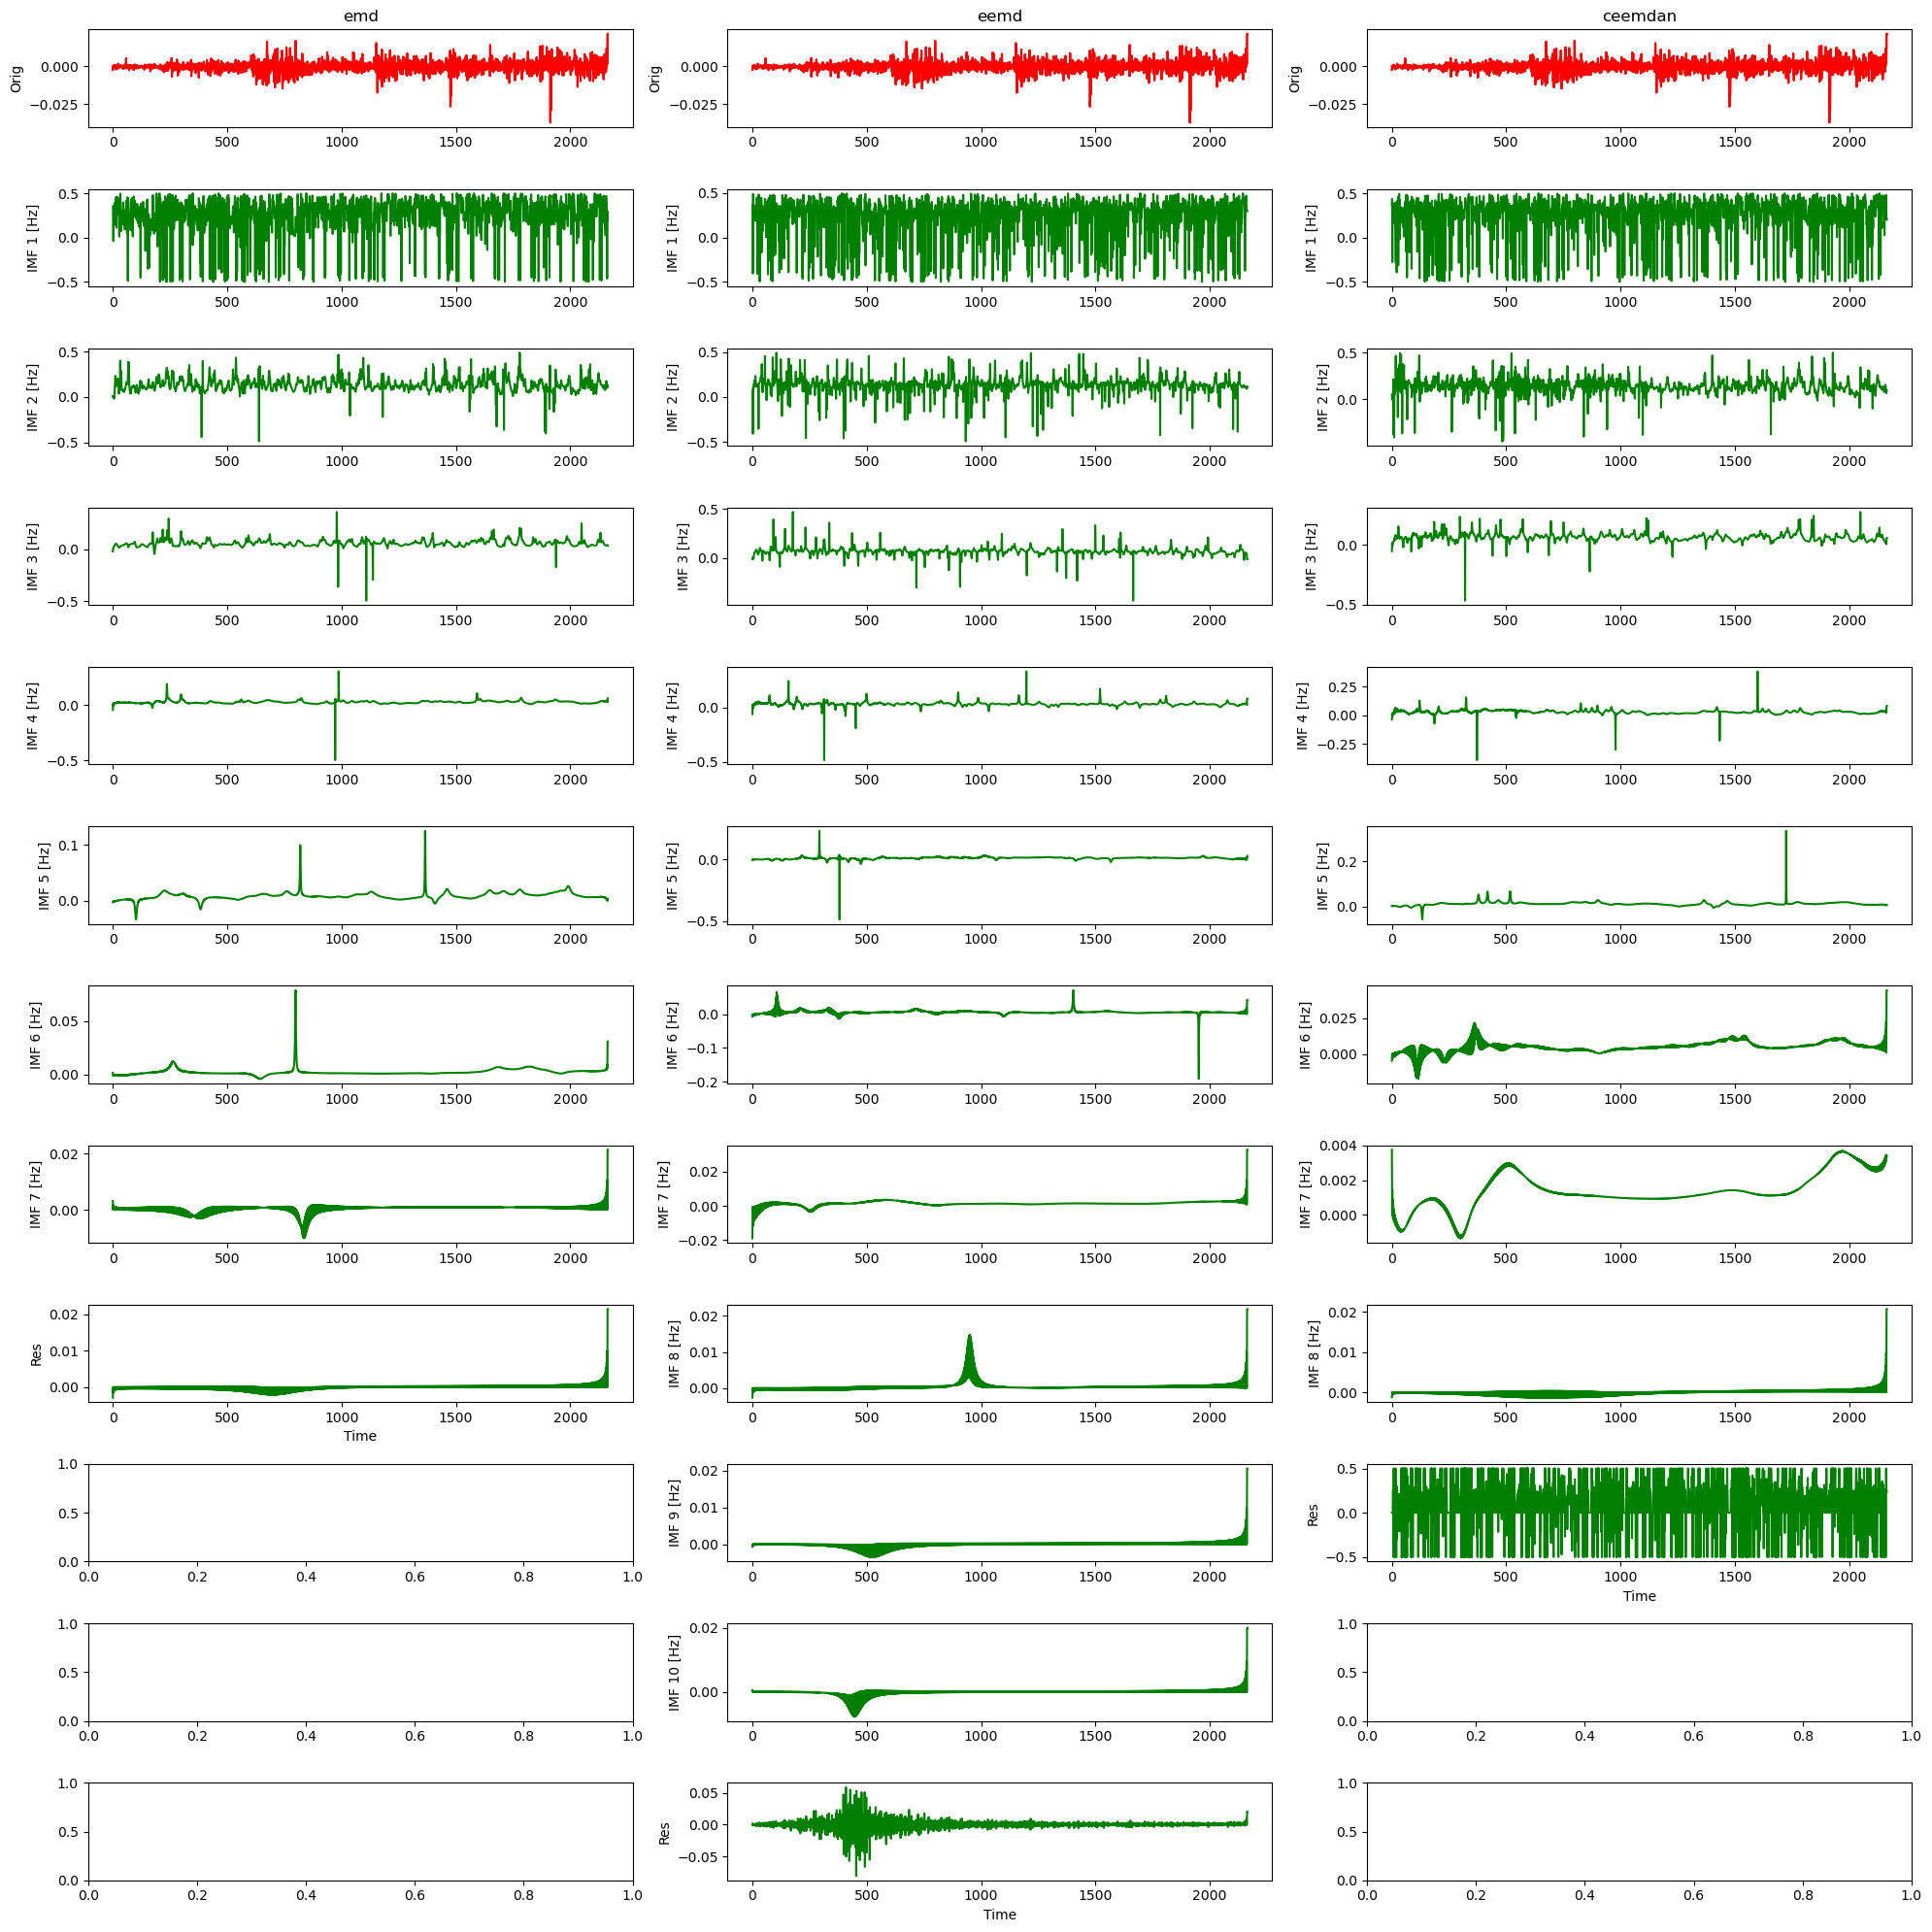

In [9]:
freq_emd = _calc_inst_freq( np.concatenate((np.array([y]), imfs_emd, np.array([res_emd])),axis=0) , t)
freq_eemd = _calc_inst_freq( np.concatenate((np.array([y]), imfs_eemd, np.array([res_eemd])),axis=0) , t)
freq_ceemdan = _calc_inst_freq( np.concatenate((np.array([y]), imfs_ceemdan, np.array([res_ceemdan])),axis=0) , t)
freqs = [freq_emd, freq_eemd, freq_ceemdan]

fig, axes = plt.subplots(nrow, ncol, figsize=(20,20))

for c in range(len(cols)):
    # orig freq
    ax = axes[0][c]
    ax.set_title(cols[c])
    ax.plot(t, freqs[c][0], 'r')
    ax.set_ylabel('orig')
    # imf freq
    for n, imf in enumerate(freqs[c]):
        ax = axes[n][c]
        if n==0:
            # orig
            ax.set_title(cols[c])
            ax.plot(t, imf, 'r')
            ax.set_ylabel('Orig')
        elif n == len(freqs[c])-1:
            # residue
            ax.plot(t, imf, 'g')
            ax.set_ylabel('Res')
            ax.set_xlabel("Time")
        else:
            # imfs
            ax.plot(t, imf, 'g')
            ax.set_ylabel('IMF {} [Hz]'.format(n))

plt.tight_layout()
plt.show()



# VMD

Variational Mode Decomposition

`pip install vmdpy`

[source](https://github.com/vrcarva/vmdpy)

[matlab toolbox](https://www.mathworks.com/matlabcentral/fileexchange/44765-variational-mode-decomposition)

> K. Dragomiretskiy and D. Zosso, "Variational Mode Decomposition," in IEEE Transactions on Signal Processing, vol. 62, no. 3, pp. 531-544, Feb.1, 2014, doi: 10.1109/TSP.2013.2288675.


In [10]:
from vmdpy import VMD  

y = np.array(df['C_Price'])
t = range(len(y))

# parameters for VMD  
alpha = len(t)*1.5       # moderate bandwidth constraint, 带宽限制 经验取值为 抽样点长度 1.5-2.0 倍；
tau = 0.            # noise-tolerance (no strict fidelity enforcement)  
num_mode = 6              # number of modes  
dc_comp = 0             # no DC component
init = 1           # initialize omegas uniformly  
tol = 1e-7          # tolerance

# Run VMD 
u, u_hat, omega = VMD(y, alpha, tau, num_mode, dc_comp, init, tol)

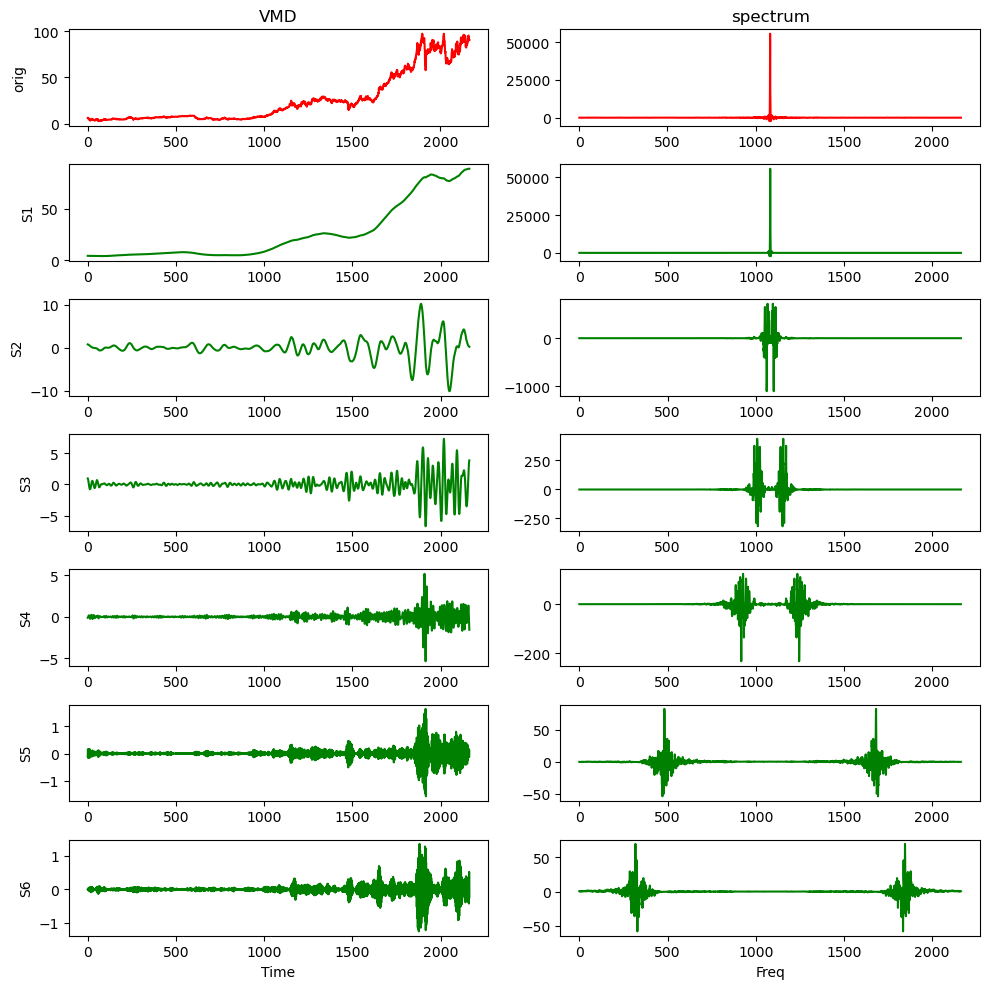

In [11]:
plot_sigs_and_spec('VMD', u, y)

# LMD

Local Mean Decomposition

`pip install PyLMD` 

[pypi](https://pypi.org/project/PyLMD/)

> Jonathan S. Smith. The local mean decomposition and its application to EEG perception data. Journal of the Royal Society Interface, 2005, 2(5):443-454

In [12]:
from PyLMD import LMD
lmd = LMD()
PFs_lmd, res_lmd = lmd.lmd(y)

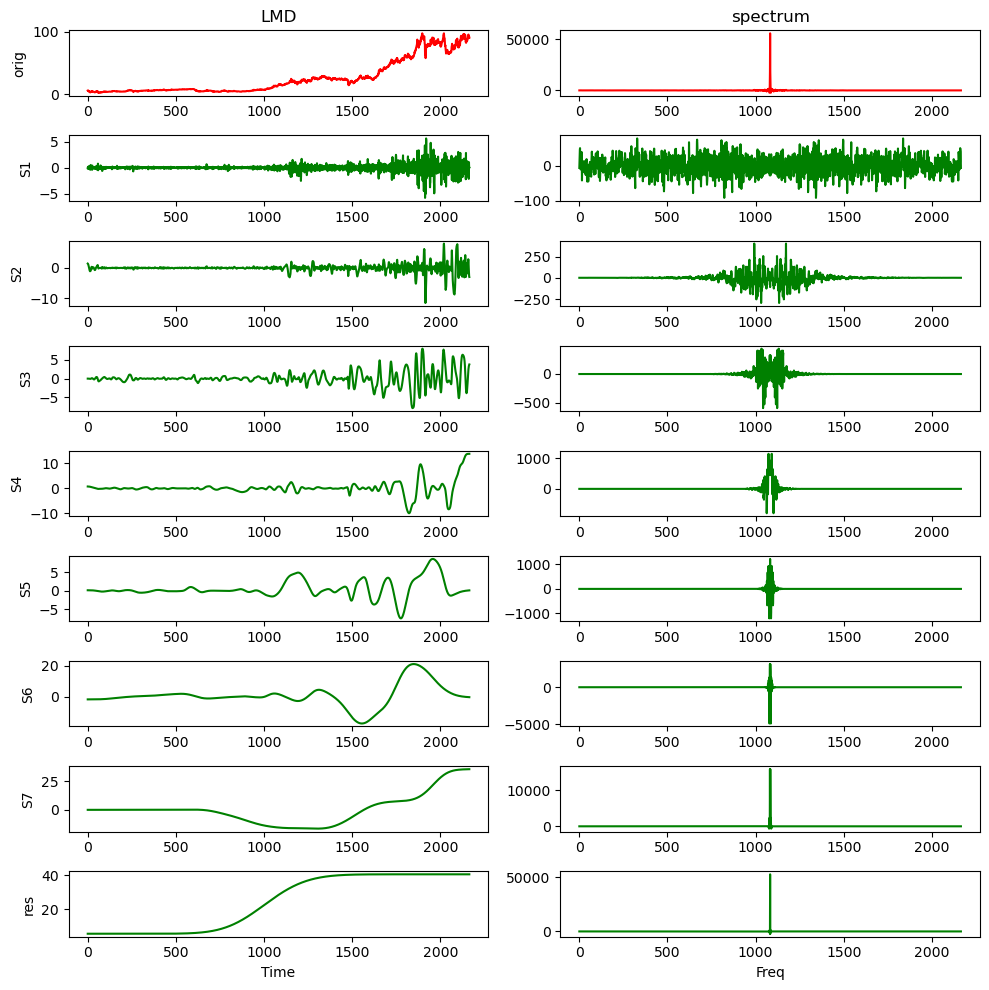

In [13]:
plot_sigs_and_spec('LMD', PFs_lmd, y, res_lmd)

# EWT

Empirical Wavelet Transform

`pip install ewtpy` 

[source](https://github.com/vrcarva/ewtpy)

[matlab toolbox](https://www.mathworks.com/matlabcentral/fileexchange/42141-empirical-wavelet-transforms)

> J. Gilles, "Empirical Wavelet Transform," in IEEE Transactions on Signal Processing, vol. 61, no. 16, pp. 3999-4010, Aug.15, 2013, doi: 10.1109/TSP.2013.2265222.


In [14]:
import ewtpy
ewt, mfb, boundaries = ewtpy.EWT1D(y, N = 6)

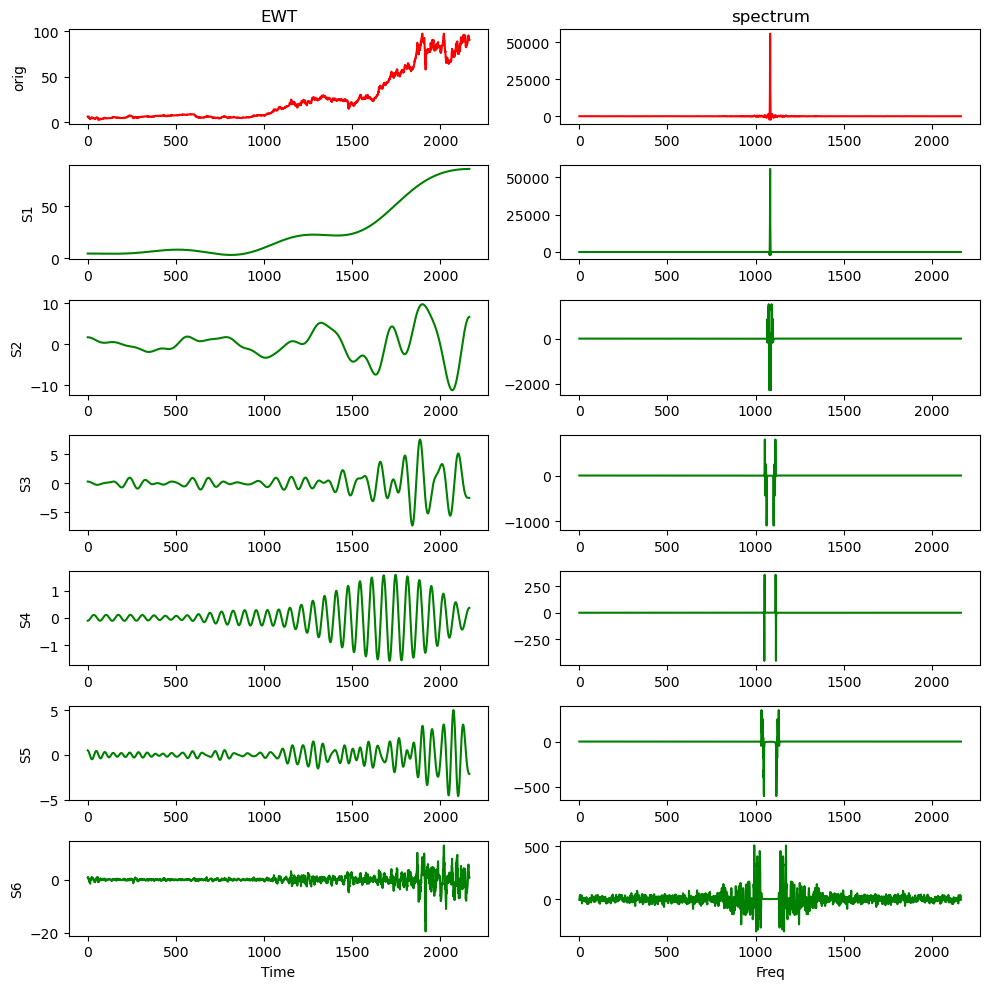

In [15]:
plot_sigs_and_spec('EWT', ewt.T, y)

# SSA

Singular Spectrum Analysis

[a really nice notebook](https://www.kaggle.com/code/jdarcy/introducing-ssa-for-time-series-decomposition)


### direct ssa

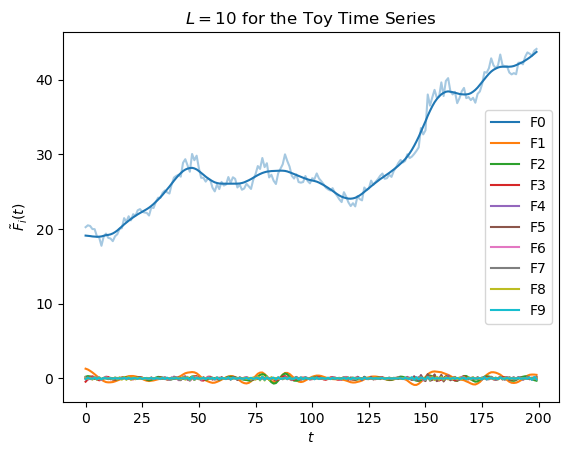

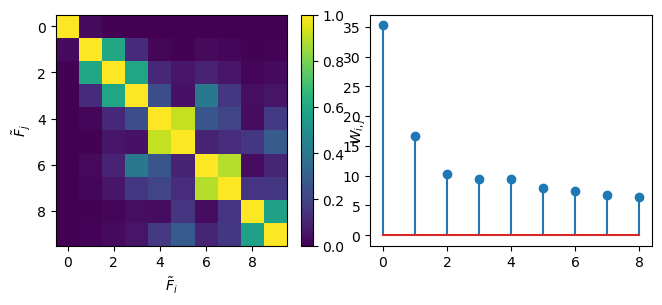

In [12]:
from ssa import SSA

# decompose with ssa
n_decomp = 10
n_integr = 6
series = y[1500:1700]

ssa = SSA(series, n_decomp)
# ssa.denoising()

ssa.components_to_df().plot()
ssa.orig_TS.plot(alpha=0.4)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title(r"$L={}$ for the Toy Time Series".format(n_decomp))
plt.show()

plt.figure(figsize=(8,3))
plt.subplot(121)
ssa.plot_wcorr()
plt.subplot(122)
plt.stem(ssa.Sigma[1:])
plt.show()

<StemContainer object of 3 artists>

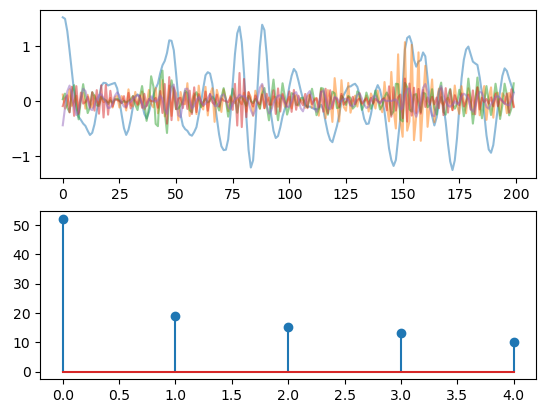

In [13]:
# group with AgglomerativeClustering based on wcorr
# n_integr = 10
from sklearn.cluster import AgglomerativeClustering
distance_matrix = 1 / ssa.Wcorr
cls = AgglomerativeClustering(n_clusters=n_integr, linkage='average', affinity='precomputed')
cls = cls.fit(distance_matrix)
reconstr = np.zeros((n_integr, len(series)))
new_sigma = np.zeros(n_integr)
for i in range(n_integr):
    reconstr[i,:] = ssa.reconstruct(np.where(cls.labels_==i)[0])
    new_sigma[i] = np.sum(ssa.Sigma[np.where(cls.labels_==i)[0]])

# sort by new sigma
sortIdx = new_sigma.argsort()[::-1] # higher sigma (signal instead of noise) comes first
reconstr = reconstr[sortIdx]
new_sigma = new_sigma[sortIdx]


plt.figure()
plt.subplot(211)
for i in range(1,len(reconstr)):
    plt.plot(reconstr[i], alpha=0.5)
plt.subplot(212)
plt.stem(new_sigma[1:])

In [14]:
# white noise test
from statsmodels.tsa import stattools
for i in range(len(reconstr)):
    LjungBox = stattools.q_stat(stattools.acf(reconstr[i])[1:11],len(reconstr[i]))
    print(LjungBox[1][0])

1.5515781229003186e-44
3.4312425453843227e-37
1.2226854418881132e-14
0.29384451091536923
1.0545819508706397e-39
1.852280339350621e-15


### denoise before grouping

<StemContainer object of 3 artists>

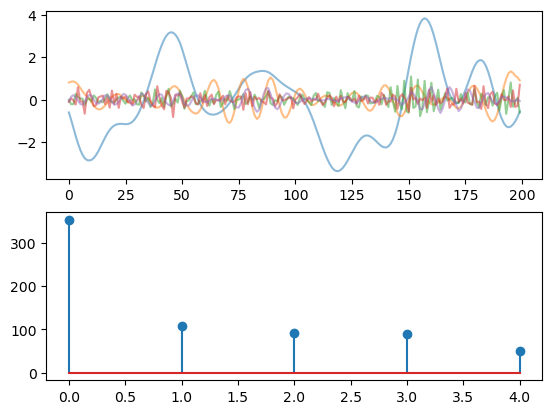

In [21]:
n_decomp = 50
n_integr = 6
series = y[1500:1700]

# decompose with ssa
ssa = SSA(series, n_decomp)

# denoise
tot = np.sum(ssa.Sigma)
acc = 0
for i in range(len(ssa.Sigma)):
    acc += ssa.Sigma[i]
    if acc > 0.98 * tot:
        break
# reco = np.array(ssa.reconstruct(range(i)))
# orig = np.array(ssa.orig_TS)
# print(cal_rmse(orig, reco))
# plt.figure()
# plt.plot(orig, alpha=0.5)
# plt.plot(reco, alpha=0.5)

# group with AgglomerativeClustering based on wcorr
from sklearn.cluster import AgglomerativeClustering
distance_matrix = 1 / ssa.Wcorr
distance_matrix = distance_matrix[0:i,0:i]
cls = AgglomerativeClustering(n_clusters=n_integr, linkage='average', affinity='precomputed')
cls = cls.fit(distance_matrix)
reconstr = np.zeros((n_integr, len(series)))
new_sigma = np.zeros(n_integr)
for i in range(n_integr):
    reconstr[i,:] = ssa.reconstruct(np.where(cls.labels_==i)[0])
    new_sigma[i] = np.sum(ssa.Sigma[np.where(cls.labels_==i)[0]])

# sort by new sigma
sortIdx = new_sigma.argsort()[::-1] # higher sigma (signal instead of noise) comes first
reconstr = reconstr[sortIdx]
new_sigma = new_sigma[sortIdx]


plt.figure()
plt.subplot(211)
for i in range(1,len(reconstr)):
    plt.plot(reconstr[i], alpha=0.5)
plt.subplot(212)
plt.stem(new_sigma[1:])


In [22]:
n_decomp = 50
n_integr = 6
series = y[1500:1700]

# decompose with ssa
ssa = SSA(series, n_decomp)


# group with AgglomerativeClustering based on wcorr
from sklearn.cluster import AgglomerativeClustering
distance_matrix = 1 / ssa.Wcorr

cls = AgglomerativeClustering(n_clusters=n_integr, linkage='average', affinity='precomputed')
cls = cls.fit(distance_matrix)
reconstr11 = np.zeros((n_integr, len(series)))
new_sigma = np.zeros(n_integr)
for i in range(n_integr):
    reconstr11[i,:] = ssa.reconstruct(np.where(cls.labels_==i)[0])
    new_sigma[i] = np.sum(ssa.Sigma[np.where(cls.labels_==i)[0]])

# sort by new sigma
sortIdx = new_sigma.argsort()[::-1] # higher sigma (signal instead of noise) comes first
reconstr11 = reconstr11[sortIdx]
new_sigma = new_sigma[sortIdx]




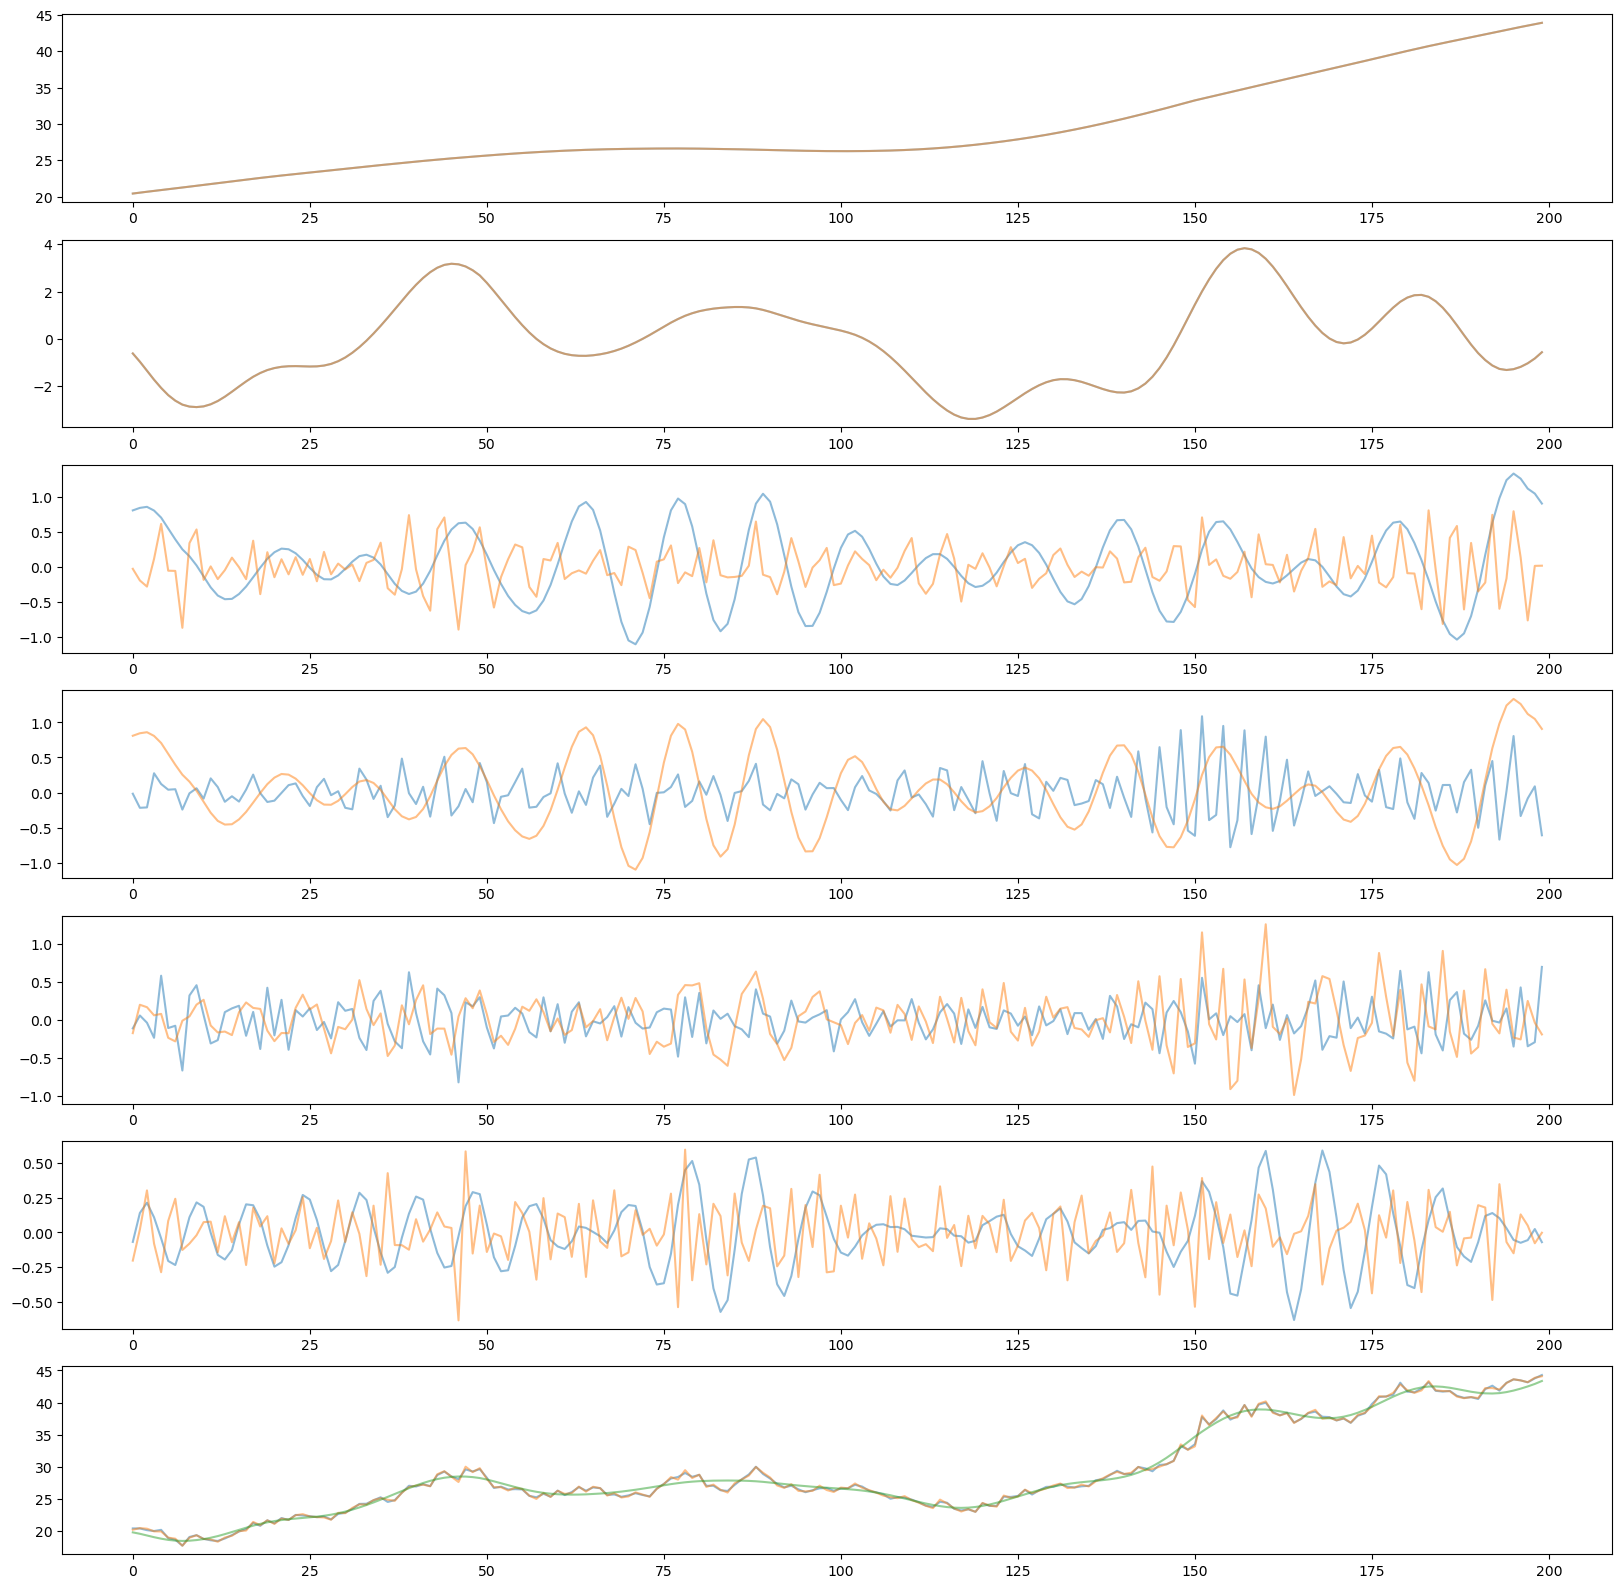

In [25]:
plt.figure(figsize=(20,20))
for i in range(n_integr):
    plt.subplot(n_integr+1, 1, i+1)
    plt.plot(reconstr[i], alpha=0.5)
    plt.plot(reconstr11[i], alpha=0.5)
plt.subplot(n_integr+1,1,i+2)
plt.plot(np.sum(reconstr, axis=0), alpha=0.5)
plt.plot(np.sum(reconstr11, axis=0), alpha=0.5)
plt.plot(reconstr[0]+reconstr[1], alpha=0.5)


### windowing effect

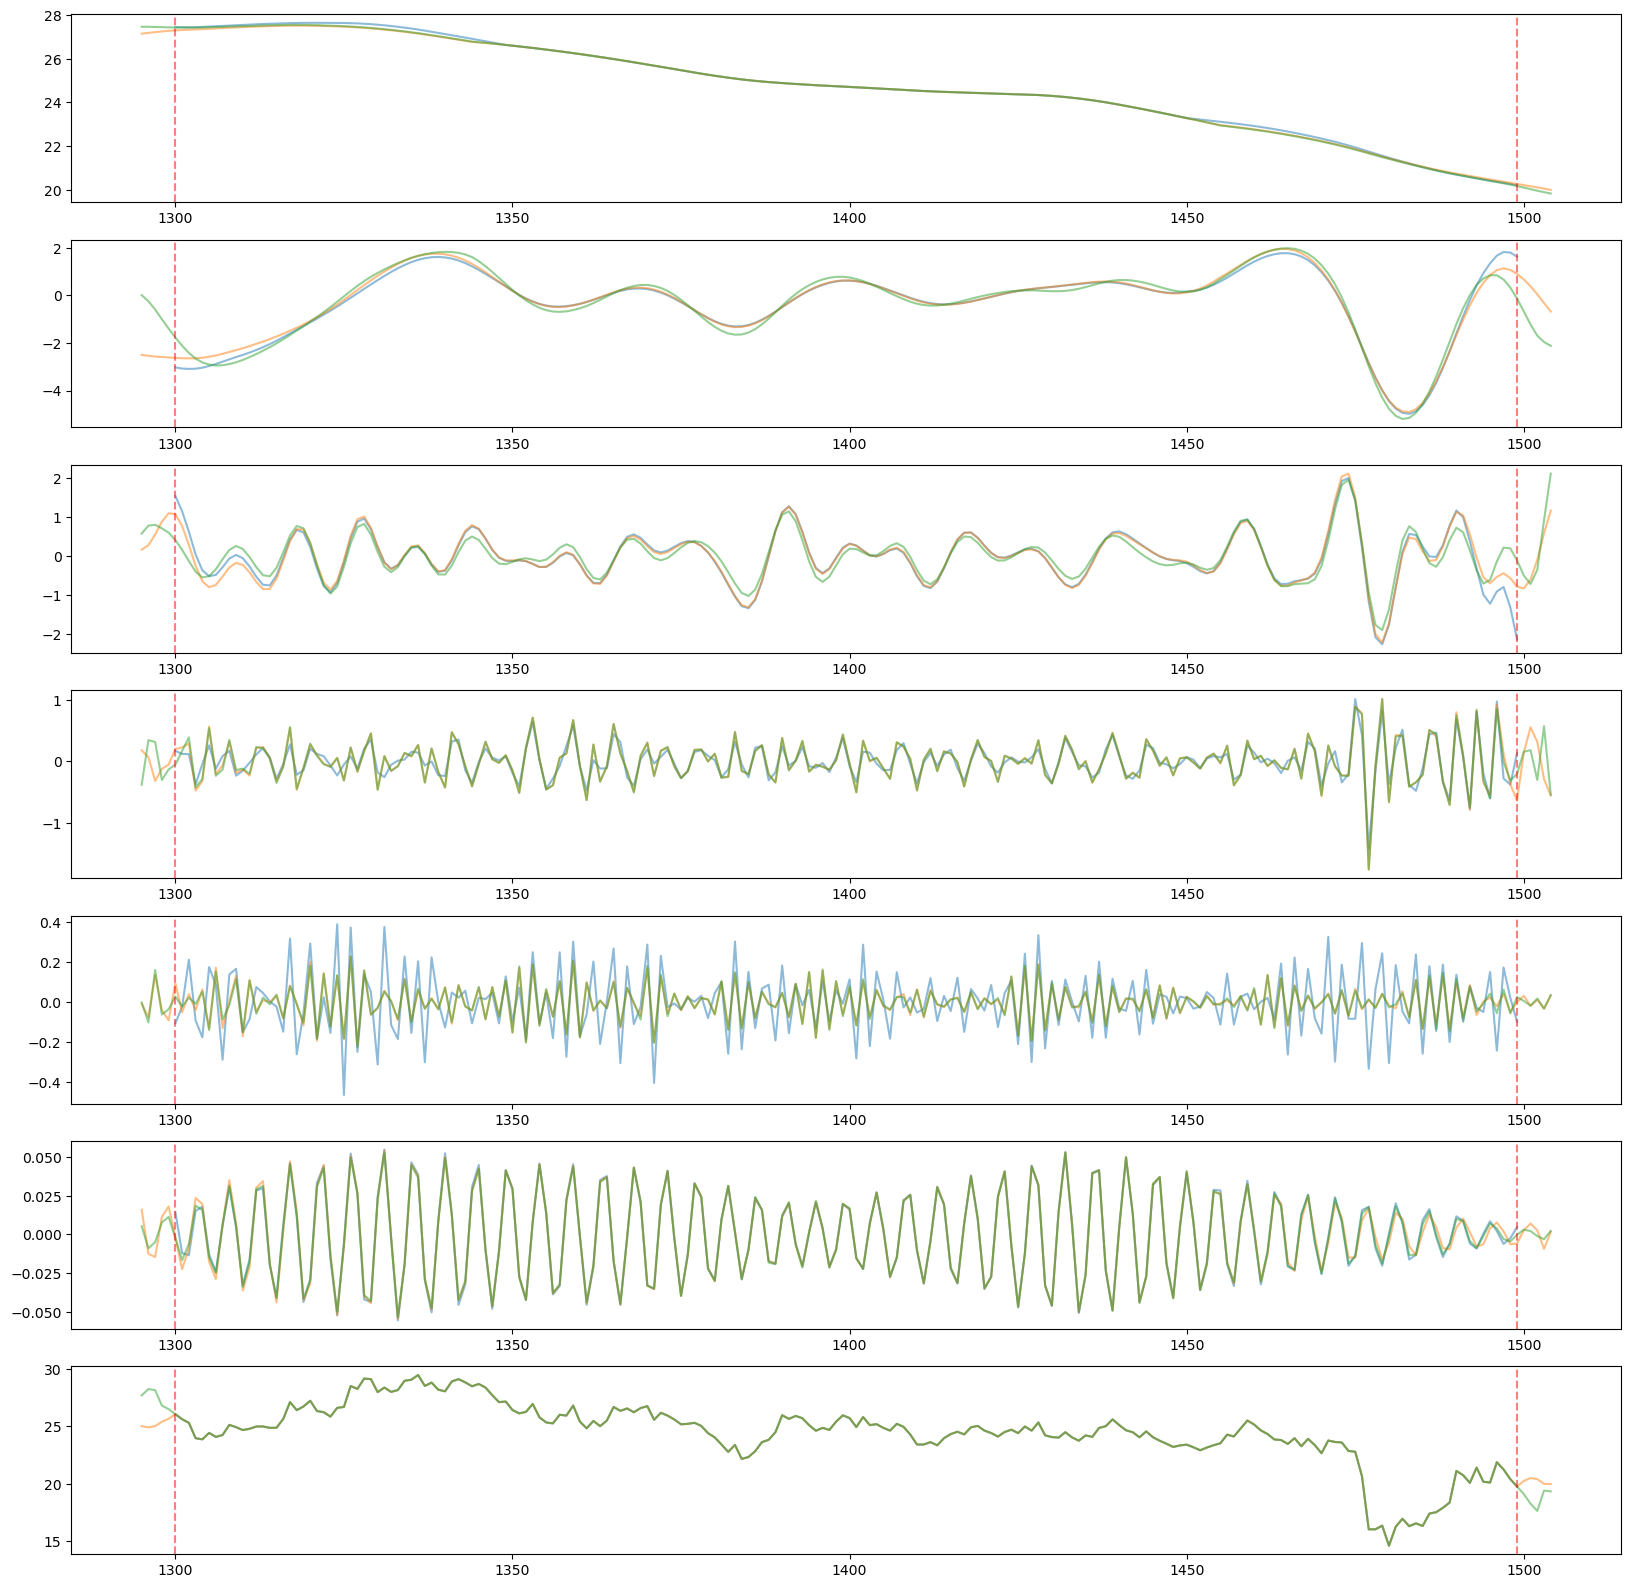

In [16]:
from series_restr import restr_ssa, restr_ssa_ex
n_decomp = 50
n_integr = 6 # 5
ex = 5

# orig series
start, end = 1300, 1500 # 1100, 1300 # 1500, 1700
x_series = range(start, end)
series = y[x_series]
reconstr = restr_ssa(series, n_decomp, n_integr)

# extend from orig series
x_series_ex = range(start-ex, end+ex)
series1 = y[x_series_ex]
reconstr1 = restr_ssa(series1, n_decomp, n_integr)
# reconstr1 = reconstr1[:,ex:-ex]

# extend with symmetry
endpt = series[-1]
tail = series[-ex-1:-1]
tail_symm = 2*endpt - tail[::-1]
startpt = series[0]
head = series[1:ex+1]
head_symm = 2*startpt - head[::-1]
series2 = np.concatenate((head_symm, series, tail_symm))
reconstr2 = restr_ssa(series2, n_decomp, n_integr)
# reconstr2 = reconstr2[:,ex:-ex]

# reconstr2 = restr_ssa_ex(series, ex, n_decomp, n_integr)


plt.figure(figsize=(20,20))
for i in range(n_integr):
    plt.subplot(n_integr+1, 1, i+1)
    plt.plot(x_series,    reconstr[i], alpha=0.5)
    plt.plot(x_series_ex, reconstr1[i], alpha=0.5)
    plt.plot(x_series_ex, reconstr2[i], alpha=0.5)
    plt.axvline(x_series[0], c='r', ls='--', alpha=0.5)
    plt.axvline(x_series[-1], c='r', ls='--', alpha=0.5)
plt.subplot(n_integr+1,1,i+2)
plt.plot(x_series,    np.sum(reconstr, axis=0), alpha=0.5)
plt.plot(x_series_ex, np.sum(reconstr1, axis=0), alpha=0.5)
plt.plot(x_series_ex, np.sum(reconstr2, axis=0), alpha=0.5)
plt.axvline(x_series[0], c='r', ls='--', alpha=0.5)
plt.axvline(x_series[-1], c='r', ls='--', alpha=0.5)

In [61]:
# plt.plot(x_series,    reconstr[2], alpha=0.5)
# plt.plot(x_series_ex, reconstr1[2], alpha=0.5)
# plt.plot(x_series_ex, reconstr2[1], alpha=0.5)
# plt.axvline(x_series[0], c='r', ls='--', alpha=0.5)
# plt.axvline(x_series[-1], c='r', ls='--', alpha=0.5)

# SARIMAX

In [1]:
import warnings
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sarimax import ADF_ACF_PACF, sweepSARIMAX, bestSARIMAX, plotPrediction

c:\Anaconda3\envs\torch37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1366 entries, 2017-01-09 to 2023-04-18
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1366 non-null   int64  
 1   C_Price     1366 non-null   float64
 2   E_Price     1366 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 42.7 KB
None


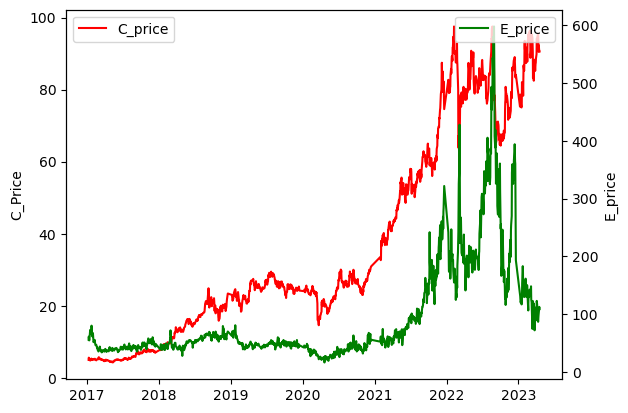

In [2]:
# load data
df = pd.read_excel('./testdata/CCprice.xlsx', sheet_name='Sheet1')
df = df.set_index('Date')
df.index = pd.DatetimeIndex(df.index)
df.index.freq = df.index.inferred_freq
date_col = df.index

# overview of data
print(df.info())
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(date_col, df['C_Price'], 'r', label='C_price')
ax1.legend(loc=2)
ax1.set_ylabel('C_Price')
ax2 = ax1.twinx() # this is the important function
ax2.plot(date_col, df['E_Price'], 'g', label='E_price')
ax2.legend(loc=1)
ax2.set_ylabel('E_price')
plt.show()

>>> orig series <<<
Results of Dickey-Fuller Test:
Test Statistic                   -0.024422
p-value                           0.956465
#Lags Used                       13.000000
Number of Observations Used    1352.000000
Critical Value (1%)              -3.435196
Critical Value (5%)              -2.863680
Critical Value (10%)             -2.567909
dtype: float64


c:\Anaconda3\envs\torch37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


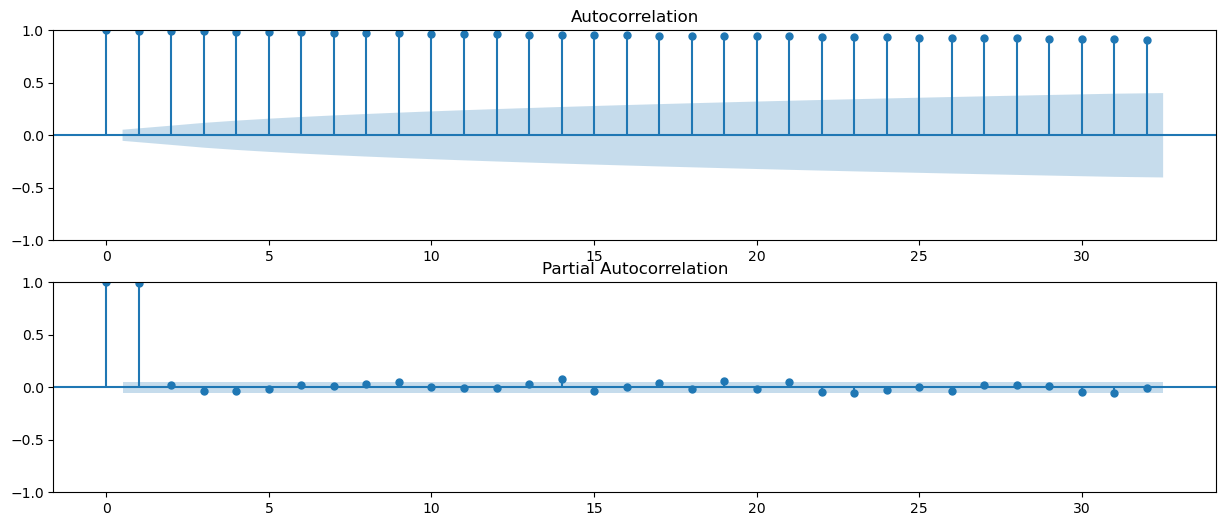

In [3]:
print('>>> orig series <<<')
ADF_ACF_PACF(df['C_Price'])

>>> diff(1) <<<
Results of Dickey-Fuller Test:
Test Statistic                -1.245385e+01
p-value                        3.526463e-23
#Lags Used                     1.200000e+01
Number of Observations Used    1.352000e+03
Critical Value (1%)           -3.435196e+00
Critical Value (5%)           -2.863680e+00
Critical Value (10%)          -2.567909e+00
dtype: float64


c:\Anaconda3\envs\torch37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


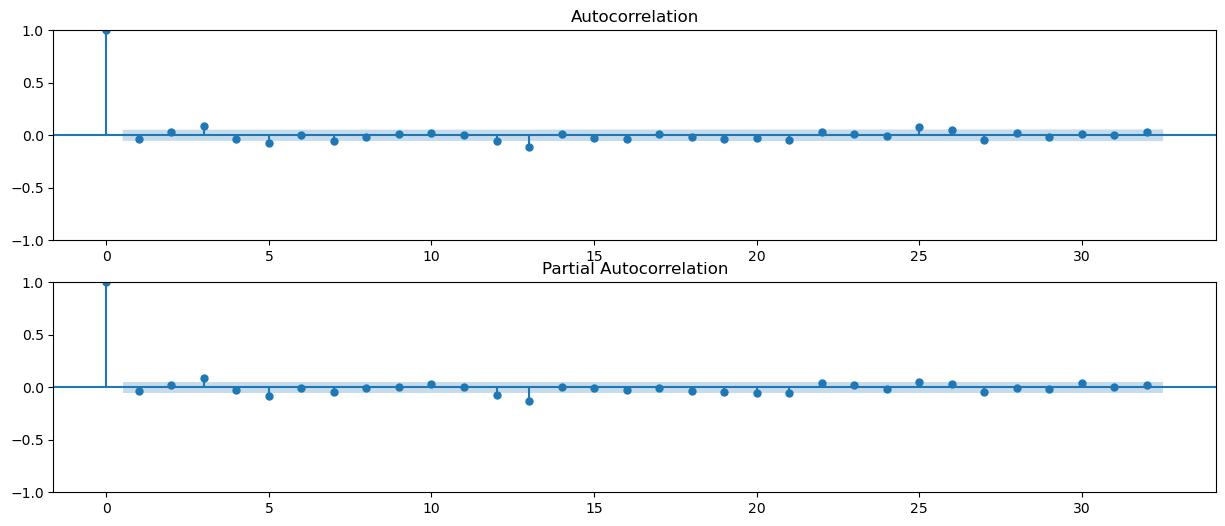

In [4]:
print('>>> diff(1) <<<')
ADF_ACF_PACF(df['C_Price'].diff(1).dropna())

There is no seasonal components. 

`diff(1)` produces a stationary series.

Try `ARIMAX(p,d,q)` model for `d=1`

Sweep for the best `p,q`.

In [3]:
# sweep for the best params
endog = df.loc[:, 'C_Price']
exog =  df.loc[:, 'E_Price']
d = 1
ps = range(16)
qs = range(16)
order = (d,ps,qs)
# aic_mat,bic_mat = sweepSARIMAX(endog, order)
# f = open("mat_sarimax.pkl", "wb")
# pickle.dump((aic_mat, bic_mat), f)
# f.close()

In [4]:
# or read from file
f = open("mat_sarimax.pkl", "rb")
aic_mat, bic_mat = pickle.load(f)
f.close()
p,q = bestSARIMAX(aic_mat, bic_mat, 'aic')
warnings.simplefilter('ignore')
model = sm.tsa.statespace.SARIMAX(endog, order=(p,d,q)).fit(disp=False)
print(model.summary())

min aic: 4878.000000, corresponding (p,q): (12,15)
                               SARIMAX Results                                
Dep. Variable:                C_Price   No. Observations:                 1366
Model:             SARIMAX(12, 1, 15)   Log Likelihood               -2411.018
Date:                Wed, 24 May 2023   AIC                           4878.035
Time:                        17:42:38   BIC                           5024.165
Sample:                             0   HQIC                          4932.731
                               - 1366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4284      0.150      2.854      0.004       0.134       0.723
ar.L2          0.2753      0.121      2.269      0.023       0.038       0.513
a

RMSE = 2.148274


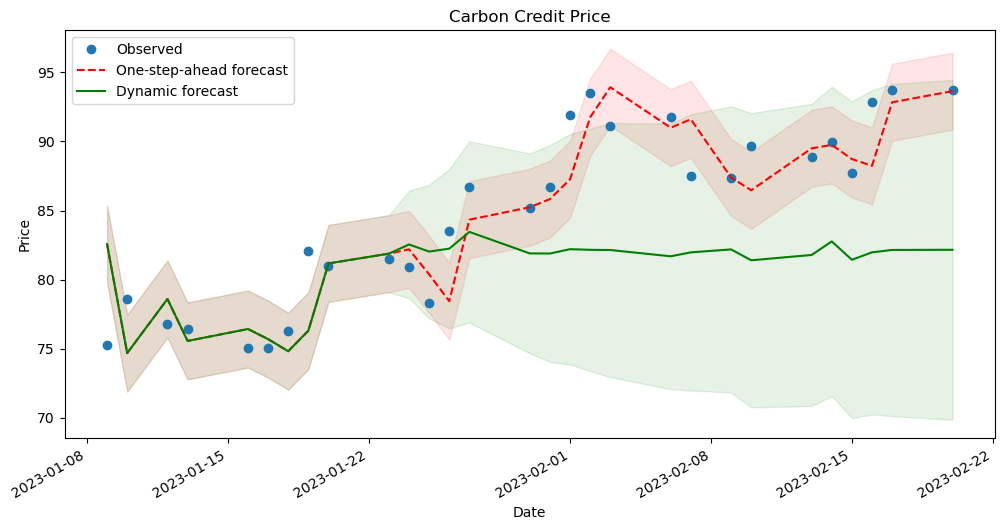

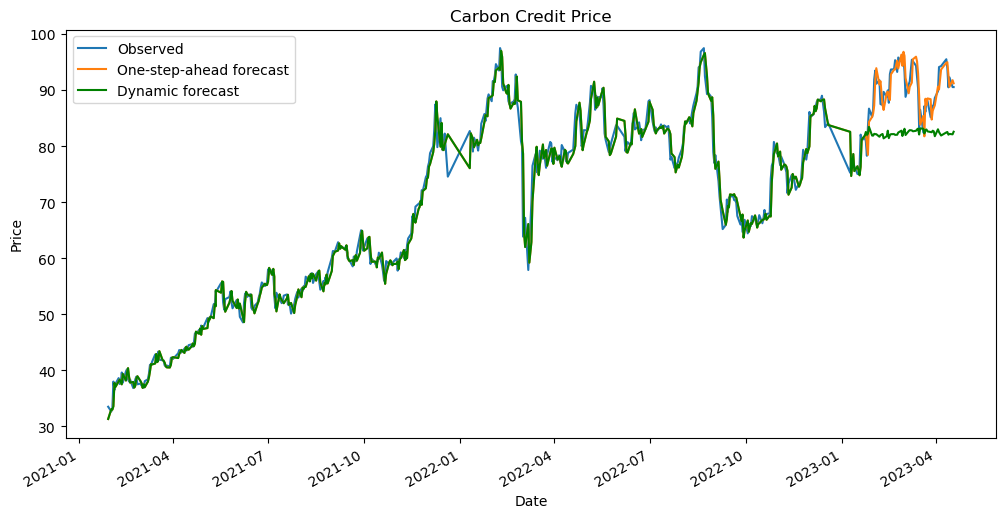

In [5]:
plotPrediction(model, df)